
0: 384x640 2 electric scooters, 57.0ms
Speed: 2.0ms preprocess, 57.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 65.0ms
Speed: 2.0ms preprocess, 65.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 electric scooters, 53.0ms
Speed: 2.0ms preprocess, 53.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 68.0ms
Speed: 1.0ms preprocess, 68.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 electric scooters, 53.0ms
Speed: 1.0ms preprocess, 53.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 66.0ms
Speed: 1.0ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 electric scooters, 53.0ms
Speed: 1.0ms preprocess, 53.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 63.0ms
Speed: 2.0ms prep

추정 거리 : 3.838167938931298m
추정 거리 : 0.467175572519084m
프레임 60


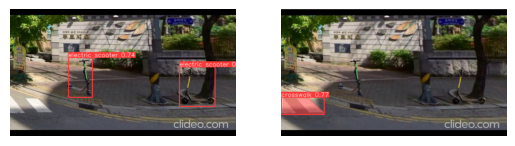


0: 384x640 2 electric scooters, 52.0ms
Speed: 2.0ms preprocess, 52.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 crosswalk, 66.0ms
Speed: 1.0ms preprocess, 66.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


추정 거리 : 3.9348837209302325m
추정 거리 : 0.4m
프레임 70


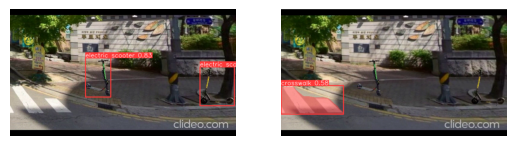


0: 384x640 2 electric scooters, 55.0ms
Speed: 2.0ms preprocess, 55.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 crosswalk, 65.0ms
Speed: 2.0ms preprocess, 65.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


추정 거리 : 3.930283969465649m
추정 거리 : 0.34706564885496183m
프레임 80


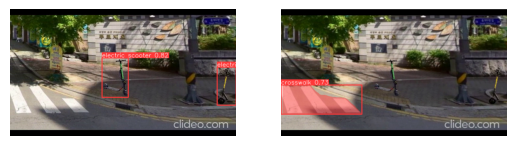


0: 384x640 1 electric scooter, 56.0ms
Speed: 2.0ms preprocess, 56.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 crosswalk, 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


추정 거리 : 0.3636363636363636m
프레임 90


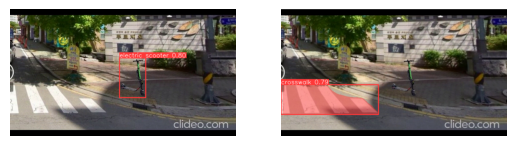


0: 384x640 1 electric scooter, 55.0ms
Speed: 2.0ms preprocess, 55.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 crosswalk, 67.0ms
Speed: 1.0ms preprocess, 67.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


추정 거리 : 0.440625m
프레임 100


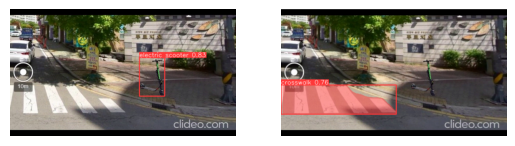

-----------------------------------------------------------------------------------------------------------------------
입력 영상에서 킥보드 0의 추정 평균 거리: 0.40370051700208187m


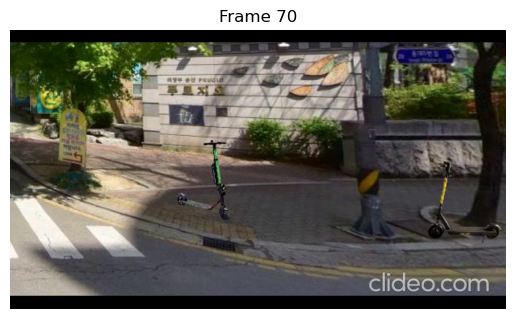


0: 384x640 2 electric scooters, 57.0ms
Speed: 2.0ms preprocess, 57.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 crosswalk, 64.0ms
Speed: 1.0ms preprocess, 64.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


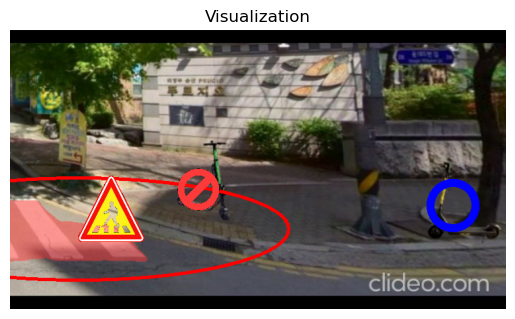

-----------------------------------------------------------------------------------------------------------------------
입력 영상에서 킥보드 1의 추정 평균 거리: 3.901111876442393m


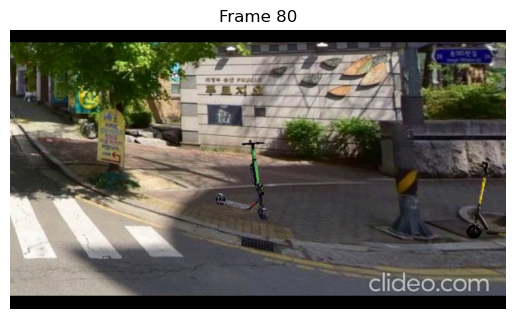


0: 384x640 2 electric scooters, 58.0ms
Speed: 2.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 crosswalk, 71.0ms
Speed: 2.0ms preprocess, 71.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


IndexError: index 750 is out of bounds for axis 1 with size 750

In [3]:
import numpy as np
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

def calculate_illegal_parking(result, result_cw, min_distance_threshold, scooter_height_cm=120):
    scooter_boxes = []
    non_scooter_boxes = []
    pixel_to_cm_ratio_array = []
    
    # 킥보드에 대한 좌표 저장
    for box in result[0].boxes:
        cls, bbox_xyxy_list, bbox_xywh_list = (
            box.cls.cpu().detach().numpy().tolist(), # 클래스 정보
            box.xyxy.cpu().detach().numpy().tolist(), # 바운딩 박스 좌표
            box.xywh.cpu().detach().numpy().tolist()
        )
        
        # 킥보드이고. 가로세로 길이 차이가 100보다 작은 경우 = 올바르게 탐지된 킥보드
        if cls[0] == 0.0 and abs(bbox_xywh_list[0][2] - bbox_xywh_list[0][3]) < 100:
            # 너비가 높이보다 큰 경우, 누워 있다고 가정하고 높이 추출            
            scooter_height = int(max(bbox_xywh_list[0][2], bbox_xywh_list[0][3]))
            
            # 픽셀과 센티미터 사이의 비율 계산            
            pixel_to_cm_ratio = scooter_height_cm / scooter_height
            pixel_to_cm_ratio_array.append(pixel_to_cm_ratio)
            scooter_boxes.append((int(bbox_xyxy_list[0][0]), int(bbox_xyxy_list[0][2]), int(bbox_xyxy_list[0][1]), int(bbox_xyxy_list[0][3])))
    
    # 횡단보도에 대한 좌표 저장
    for box in result_cw[0].boxes:
        cw_bbox_xyxy_list = box.xyxy.cpu().detach().numpy().tolist()
        non_scooter_boxes.append((int(cw_bbox_xyxy_list[0][0]), int(cw_bbox_xyxy_list[0][2]), int(cw_bbox_xyxy_list[0][1]), int(cw_bbox_xyxy_list[0][3])))
    
    # 킥보드 또는 다른 객체의 바운딩 박스가 없는 경우
    if not scooter_boxes or not non_scooter_boxes:
        return []
    
    # 픽셀과 센티미터 사이의 평균 비율 계산
    avg_pixel_to_cm_ratio = np.mean(pixel_to_cm_ratio_array)

    scooter_distances = [] # 킥보드 간 거리를 저장할 딕셔너리
    
    # 각 킥보드에 대한 처리
    for scooter_coords in scooter_boxes:
        min_distance = float('inf') # 초기 최소 거리를 무한대로 설정
        closest_non_scooter = None # 가장 가까운 킥보드가 아닌 객체의 정보
        
        # 모든 다른 객체에 대한 처리
        for non_scooter_coords in non_scooter_boxes:
            # 각각의 x좌표를 이용하여 픽셀 거리 계산
            x_calc = [abs(scooter_coords[i] - non_scooter_coords[j]) for i, j in [(0, 0), (1, 1), (0, 1), (1, 0)]]
            # 가장 작은 픽셀 거리 계산
            min_pixel_distance = min(x_calc)
            # 추정 거리 계산 (센티미터)
            estimated_distance_cm = min_pixel_distance * avg_pixel_to_cm_ratio
            
            # 현재까지의 최소 거리보다 작은 경우 업데이트
            if estimated_distance_cm < min_distance:
                min_distance = estimated_distance_cm
                closest_non_scooter = non_scooter_coords

        # 가장 가까운 킥보드가 아닌 객체가 있는 경우 출력
        if closest_non_scooter:
            print(f"추정 거리 : {min_distance / 100}m")
            scooter_distances.append(min_distance / 100)

    return scooter_distances

def process_frame(frame, model, model_cw, min_distance_threshold, frame_count, all_scooter_distances):
    if frame_count % 10 == 0:
        # YOLO를 이용하여 프레임 예측
        result = model.predict(frame, imgsz=640, conf=0.5)
        result_cw = model_cw.predict(frame, imgsz=640, conf=0.5)
        scooter_distances = sorted(calculate_illegal_parking(result, result_cw, min_distance_threshold))
        
        # 유효한 거리가 있는 경우만 추가
        if scooter_distances:
            all_scooter_distances[frame_count] = scooter_distances # 현재 프레임의 거리 저장
            print(f"프레임 {frame_count}")
            
            # 결과를 프레임에 표시
            annotated_frame = result[0].plot()
            annotated_frame_cw = result_cw[0].plot()
            
            # 프레임을 보여주기
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(annotated_frame_cw, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.show()

def main():
    model = YOLO('best4.pt')
    model_cw = YOLO('횡단보도.pt')
    # 비디오 파일 열기
    cap = cv2.VideoCapture('crosswalk_test.mp4')

    frame_count = 0
    min_distance_threshold = 2.0
    all_scooter_distances = {} # 모든 킥보드 간 거리를 저장할 딕셔너리
    
    # 비디오 프레임 반복
    while cap.isOpened():
        # 비디오에서 한 프레임 읽기
        success, frame = cap.read()
        frame_count += 1

        if success:
            process_frame(frame, model, model_cw, min_distance_threshold, frame_count, all_scooter_distances)
        else:
            break
            
    print("-----------------------------------------------------------------------------------------------------------------------")

    # 각 킥보드에 대한 거리를 저장할 딕셔너리
    scooter_distances_across_frames = {}
    # 불법 주차된 킥보드 수
    illegally_parked_count = 0
    
    # 각 프레임별 킥보드의 추정 거리를 모아둔 dictionary를 생성
    for frame_num, scooter_distances in all_scooter_distances.items():
        for scooter_index, distance in enumerate(scooter_distances):
            scooter_distances_across_frames.setdefault(scooter_index, []).append(distance)
    
    # 각 킥보드에 대해 평균 추정 거리를 계산하고 출력
    for scooter_index, distances_for_scooter in scooter_distances_across_frames.items():
        if distances_for_scooter:
            avg_distance_for_scooter = np.mean(distances_for_scooter)
            print(f"입력 영상에서 킥보드 {scooter_index}의 추정 평균 거리: {avg_distance_for_scooter}m")
            
            # 평균 거리가 임계값 이하인 경우 불법 주차로 간주
            if avg_distance_for_scooter <= min_distance_threshold:
                illegally_parked_count += 1
                
            # 각 프레임별 추정 거리와의 차이 중 가장 작은 값을 찾아 그 때의 프레임을 가져옴
            min_diff_frame = None
            min_diff = float('inf')

            for frame_num, scooter_distances in all_scooter_distances.items():
                if scooter_index < len(scooter_distances):
                    diff = abs(avg_distance_for_scooter - scooter_distances[scooter_index])
                    if diff < min_diff:
                        min_diff = diff
                        min_diff_frame = frame_num

            # 차이가 가장 작은 프레임을 화면에 출력
            cap.set(cv2.CAP_PROP_POS_FRAMES, min_diff_frame - 1)
            success, closest_frame = cap.read()

            plt.imshow(cv2.cvtColor(closest_frame, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Frame {min_diff_frame}")
            plt.show()

            ## 여기부터 출력 결과 후처리 (타원,불법 텍스트 출력)
            result2 = model.predict(closest_frame, imgsz=640, conf=0.5) # 다시 모델 추론
            result2_cw = model_cw.predict(closest_frame, imgsz=640, conf=0.5)
            crosswalk = []
            scooter_boxes = []
            scooter_height_cm= 120
            pixel_to_cm_ratio_array = []

            annotated_frame2 = result2_cw[0].plot(boxes=False)

            # 버스 정류장 찾기 + 픽셀과 센티미터 사이의 평균 비율 계산 (위 함수와 동일)
            for box in result2[0].boxes:
                cls, bbox_xyxy_list, bbox_xywh_list = (
                    box.cls.cpu().detach().numpy().tolist(), 
                    box.xyxy.cpu().detach().numpy().tolist(), 
                    box.xywh.cpu().detach().numpy().tolist()
                )
                if cls[0] == 0.0 and abs(bbox_xywh_list[0][2] - bbox_xywh_list[0][3]) < 100:
                    scooter_height = int(max(bbox_xywh_list[0][2], bbox_xywh_list[0][3]))
                    pixel_to_cm_ratio = scooter_height_cm / scooter_height
                    pixel_to_cm_ratio_array.append(pixel_to_cm_ratio)
                    scooter_boxes.append((int(bbox_xyxy_list[0][0]), int(bbox_xywh_list[0][1]),int(bbox_xyxy_list[0][1]),int(bbox_xyxy_list[0][2]),int(bbox_xyxy_list[0][3])))
                elif cls[0] == 0.0:
                    continue
            for box in result2_cw[0].boxes:
                cw_bbox_xywh_list = box.xywh.cpu().detach().numpy().tolist()
                cw_bbox_xyxy_list = box.xyxy.cpu().detach().numpy().tolist()
                # center, bus_stop_size 계산에 사용
                crosswalk.append((int(cw_bbox_xywh_list[0][0]),int(cw_bbox_xywh_list[0][3]),int(cw_bbox_xyxy_list[0][0]),int(cw_bbox_xyxy_list[0][2]),int(cw_bbox_xywh_list[0][1])))
            avg_pixel_to_cm_ratio = np.mean(pixel_to_cm_ratio_array)

            # 2m에 해당하는 픽셀 수 계산
            five_m = int(200 / avg_pixel_to_cm_ratio)

            # 타원 그리기
            for crosswalk_coords in crosswalk:
                crosswalk_size = abs(crosswalk_coords[2]-crosswalk_coords[3])

                # 타원 관련 파라미터
                center = (crosswalk_coords[0],crosswalk_coords[4]) #
                axes = (five_m+(crosswalk_size//2), crosswalk_coords[1]//2+30) # 장축 = (2m 픽셀 + 버스 정류장 너비), 단축 = 횡단보도 높이
                color = (0,0,255)
                thickness = 4

                cv2.ellipse(annotated_frame2, center, axes, 0, 0, 360, color, thickness)  
                
                flag_image = cv2.imread('crosswalk.png')
                # violation_image의 배경을 흑백 이미지로 변환
                gray_flag_image = cv2.cvtColor(flag_image, cv2.COLOR_BGR2GRAY)
                # 흑백 이미지에서 검은색을 투명으로 변경
                _, alpha_channel = cv2.threshold(gray_flag_image, 0, 255, cv2.THRESH_BINARY)
                b, g, r = cv2.split(flag_image)
                rgba_flag_image = cv2.merge((b, g, r, alpha_channel))
                # 변경된 이미지를 원하는 크기로 resize
                resized_flag_image = cv2.resize(rgba_flag_image, (100, 100))
                # 알파 채널을 사용하여 BGR로 변환
                resized_bgr_flag_image = cv2.cvtColor(resized_flag_image, cv2.COLOR_BGRA2BGR)

                # 이미지 오버레이
                h, w, _ = resized_bgr_flag_image.shape
                for i in range(h):
                    for j in range(w):
                        if resized_bgr_flag_image[i, j, 0] != 0 or resized_bgr_flag_image[i, j, 1] != 0 or resized_bgr_flag_image[i, j, 2] != 0:
                            annotated_frame2[
                                center[1] + i-80,
                                center[0] + j
                            ] = resized_bgr_flag_image[i, j]

            # 텍스트 그리기
            for scooter_coords in scooter_boxes:
                color = (0,0,0)
                thickness = 2 
                
                #cv2.rectangle(annotated_frame2, (scooter_coords[0], scooter_coords[2]), (scooter_coords[3], scooter_coords[4]), color, thickness)
                
                text_position = (scooter_coords[0],scooter_coords[1])
                
                if crosswalk_coords[0] - axes[0]  < scooter_coords[0] < crosswalk_coords[0] + axes[0] :
                    violation_image = cv2.imread('violation2.png')
                    
                    # violation_image의 배경을 흑백 이미지로 변환
                    gray_violation_image = cv2.cvtColor(violation_image, cv2.COLOR_BGR2GRAY)

                    # 흑백 이미지에서 검은색을 투명으로 변경
                    _, alpha_channel = cv2.threshold(gray_violation_image, 0, 255, cv2.THRESH_BINARY)

                    b, g, r = cv2.split(violation_image)
                    rgba_violation_image = cv2.merge((b, g, r, alpha_channel))

                    # 변경된 이미지를 원하는 크기로 resize
                    resized_violation_image = cv2.resize(rgba_violation_image, (70, 70))

                    # 알파 채널을 사용하여 BGR로 변환
                    resized_bgr_violation_image = cv2.cvtColor(resized_violation_image, cv2.COLOR_BGRA2BGR)


                    # 이미지 오버레이
                    h, w, _ = resized_bgr_violation_image.shape
                    for i in range(h):
                        for j in range(w):
                            if resized_bgr_violation_image[i, j, 0] != 0 or resized_bgr_violation_image[i, j, 1] != 0 or resized_bgr_violation_image[i, j, 2] != 0:
                                annotated_frame2[
                                    text_position[1] + i-20,
                                    text_position[0] + j
                                ] = resized_bgr_violation_image[i, j]
                else:
                    no_violation_image = cv2.imread('non_violation.png')

                    # violation_image의 배경을 흑백 이미지로 변환
                    gray_no_violation_image = cv2.cvtColor(no_violation_image, cv2.COLOR_BGR2GRAY)

                    # 흑백 이미지에서 검은색을 투명으로 변경
                    _, alpha_channel = cv2.threshold(gray_no_violation_image, 0, 255, cv2.THRESH_BINARY)

                    b, g, r = cv2.split(no_violation_image)
                    rgba_no_violation_image = cv2.merge((b, g, r, alpha_channel))

                    # 변경된 이미지를 원하는 크기로 resize
                    resized_no_violation_image = cv2.resize(rgba_no_violation_image, (80, 80))

                    # 알파 채널을 사용하여 BGR로 변환
                    resized_bgr_no_violation_image = cv2.cvtColor(resized_no_violation_image, cv2.COLOR_BGRA2BGR)


                    # 이미지 오버레이
                    h, w, _ = resized_bgr_no_violation_image.shape
                    for i in range(h):
                        for j in range(w):
                            if resized_bgr_no_violation_image[i, j, 0] != 0 or resized_bgr_no_violation_image[i, j, 1] != 0 or resized_bgr_no_violation_image[i, j, 2] != 0:
                                annotated_frame2[
                                    text_position[1] + i-30,
                                    text_position[0] + j
                                ] = resized_bgr_no_violation_image[i, j]
            # 이미지 표시
            plt.imshow(cv2.cvtColor(annotated_frame2, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title('Visualization')
            plt.show()
            
            print("-----------------------------------------------------------------------------------------------------------------------")

    print(f"영상에서 불법 주차된 킥보드 수: {illegally_parked_count}")

if __name__ == "__main__":
    main()
